# Lets Grow More - Data Science Internship
## Author: Settara Pramod



# TASK-1 Iris - Flower Classification ML Project

## Importing Required Packages

In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

## Importing Iris Dataset

In [56]:
from sklearn.datasets import load_iris
iris=load_iris()


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
data=pd.DataFrame(iris.data)
data = data.rename(columns={0:'sepal length (cm)',1:'sepal width (cm)',2:'petal length (cm)',3:'petal width (cm)'})

In [12]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Basic Information about the Dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plotting the Dataset

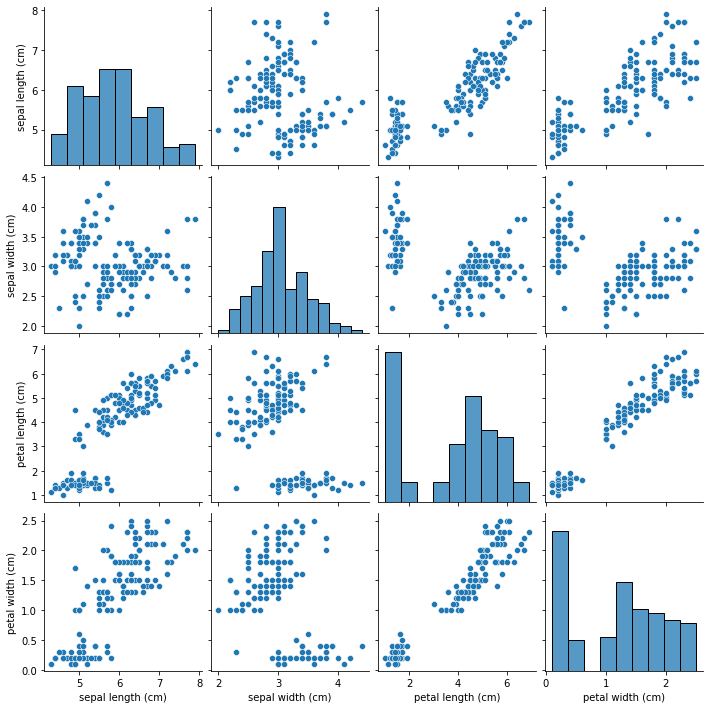

In [16]:
sns.pairplot(data)

## Defineing X and y independent and dependent 

In [17]:
X=iris.data 
y=iris.target 

In [18]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
y[:5]

array([0, 0, 0, 0, 0])

## Preprocessing Data using Standard Scaler

In [22]:
SC = StandardScaler()

In [23]:
X = SC.fit_transform(X)

## Splitting Dataset for Training and Testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Models

## Logistic Regression

In [28]:
LR = LogisticRegression().fit(X_train,y_train)

In [30]:
ypred = LR.predict(X_test)

In [35]:
print('F1 Score:',f1_score(y_test,ypred,average=None)) 

F1 Score: [1. 1. 1.]


Confusion Matrix

In [46]:
cm = confusion_matrix(y_test,ypred)

In [38]:
print('confusion Matrix is:','\n',cm)

confusion Matrix is: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
print('Accuracy is :',accuracy_score(y_test,ypred)*100)

Accuracy is : 100.0


Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


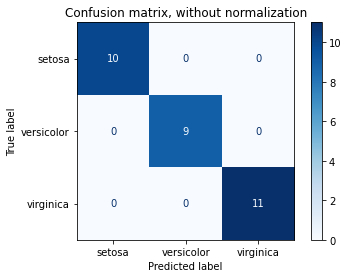

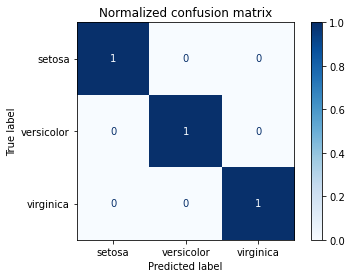

In [55]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, X_test, y_test,
                                 display_labels=iris.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
